In [20]:
!pip install folium

In [22]:
# The code was removed by Watson Studio for sharing.

,Neighborhoods,Latitude,Longitude,Population
0,Aundh,18.5602,73.8031,1000
1,Baner,18.5590,73.7868,1000
2,Bavdhan Khurd,18.5135,73.7699,1000
3,Bavdhan Budruk,18.5135,73.7699,1000
4,Balewadi,18.5789,73.7707,1000


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [24]:
pune_pop = pd.DataFrame(df[['Neighborhoods','Population']])
pune_pop.head()

,Neighborhoods,Population
0,Aundh,1000
1,Baner,1000
2,Bavdhan Khurd,1000
3,Bavdhan Budruk,1000
4,Balewadi,1000


In [25]:
pn_latitude = df['Latitude'].mean()
pn_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Pune are : ",pn_latitude,pn_longitude)

Latitude and Longitude of Pune are :  18.33027397435897 73.90693287179488


In [26]:
pn_map = folium.Map(location=[pn_latitude,pn_longitude],zoom_start=12,control_scale=True)

In [27]:
neighborhood_colors ={}
for i in df['Neighborhoods']:
    neighborhood_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [30]:
for lat,lng,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Neighborhoods']):
    label_text = nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=neighborhood_colors[nei],
    fill=True,
    fill_color = neighborhood_colors[nei],
    fill_opacity=0.7).add_to(pn_map)

In [32]:
pn_map

In [33]:
CLIENT_ID = 'PVPEVSGTR5WZUDUA4JQQ3ZGCWYC1BBKV4XWYLUJYRDAZ54TD'
CLIENT_SECRET = 'S3G2BSR32XEHYT1CUB02MGXM3Z1SQOCQYVRXRIFY1JBCLRC3'
VERSION = '20200824'
LIMIT = 150

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [37]:
pn_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'])

Fetching venues for :  Aundh
Fetching venues for :  Baner
Fetching venues for :  Bavdhan Khurd
Fetching venues for :  Bavdhan Budruk
Fetching venues for :  Balewadi
Fetching venues for :  Shivajinagar
Fetching venues for :  Bibvewadi
Fetching venues for :  Bhugaon
Fetching venues for :  Bhukum
Fetching venues for :  Dhankawadi
Fetching venues for :  Dhanori
Fetching venues for :  Dhayari
Fetching venues for :  Erandwane
Fetching venues for :  Fursungi
Fetching venues for :  Ghorpadi
Fetching venues for :  Hadapsar
Fetching venues for :  Hingne Khurd
Fetching venues for :  Karve Nagar
Fetching venues for :  Katraj
Fetching venues for :  Khadki
Fetching venues for :  Kharadi
Fetching venues for :  Kondhwa
Fetching venues for :  Koregaon Park
Fetching venues for :  Kothrud
Fetching venues for :  Manjri
Fetching venues for :  Markal
Fetching venues for :  Mohammed Wadi
Fetching venues for :  Mundhwa
Fetching venues for :  Parvati
Fetching venues for :  Panmala
Fetching venues for :  Pashan

In [38]:
print("Total number of venues found in Pune are : ",pn_venues.shape[0])

Total number of venues found in Pune are :  225


In [39]:
pn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aundh,18.5602,73.8031,Richie's Cake Shop,18.560734,73.804724,Bakery
1,Aundh,18.5602,73.8031,La Bouchee d'Or,18.558395,73.803787,Bakery
2,Aundh,18.5602,73.8031,Cafe Peter Donuts,18.557740,73.804401,Donut Shop
3,Aundh,18.5602,73.8031,Westend mall,18.561814,73.807220,Shopping Mall
4,Aundh,18.5602,73.8031,Shivsagar pure veg,18.560502,73.805775,Vegetarian / Vegan Restaurant


In [40]:
pn_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant    32
Café                 14
Bakery               13
Snack Place          11
ATM                  11
Breakfast Spot        7
Juice Bar             6
Shopping Mall         6
Pizza Place           6
Gym                   6
Name: Neighborhood, dtype: int64

In [41]:
print("Total number of unique categories in Pune are : ",len(pn_venues['Venue Category'].unique()))

Total number of unique categories in Pune are :  72


In [118]:
individual_pn_venue_count = pn_venues.groupby(['Neighborhood'])['Neighborhood'].count().to_frame()
individual_pn_venue_count.columns = ['NumberOfVenues']

In [119]:
individual_pn_venue_count.reset_index(inplace=True)

In [120]:
individual_pn_venue_count

,Neighborhood,NumberOfVenues
0,Aundh,20
1,Balewadi,2
2,Baner,16
3,Bavdhan Budruk,2
4,Bavdhan Khurd,2
5,Bhugaon,2
6,Bhukum,1
7,Bibvewadi,8
8,Dhankawadi,5
9,Dhanori,2


[Text(0, 0, 'Aundh'),
 Text(0, 0, 'Balewadi'),
 Text(0, 0, 'Baner'),
 Text(0, 0, 'Bavdhan\xa0Budruk'),
 Text(0, 0, 'Bavdhan\xa0Khurd'),
 Text(0, 0, 'Bhugaon'),
 Text(0, 0, 'Bhukum'),
 Text(0, 0, 'Bibvewadi'),
 Text(0, 0, 'Dhankawadi'),
 Text(0, 0, 'Dhanori'),
 Text(0, 0, 'Dhayari'),
 Text(0, 0, 'Erandwane'),
 Text(0, 0, 'Fursungi'),
 Text(0, 0, 'Ghorpadi'),
 Text(0, 0, 'Hadapsar'),
 Text(0, 0, 'Hingne Khurd'),
 Text(0, 0, 'Karve Nagar'),
 Text(0, 0, 'Katraj'),
 Text(0, 0, 'Khadki'),
 Text(0, 0, 'Kharadi'),
 Text(0, 0, 'Kondhwa'),
 Text(0, 0, 'Koregaon Park'),
 Text(0, 0, 'Kothrud'),
 Text(0, 0, 'Manjri'),
 Text(0, 0, 'Markal'),
 Text(0, 0, 'Mohammed Wadi'),
 Text(0, 0, 'Mundhwa'),
 Text(0, 0, 'Panmala'),
 Text(0, 0, 'Parvati'),
 Text(0, 0, 'Pashan'),
 Text(0, 0, 'Pirangut'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Shivane'),
 Text(0, 0, 'Undri'),
 Text(0, 0, 'Vishrantwadi'),
 Text(0, 0, 'Wadgaon Sheri'),
 Text(0, 0, 'Yerwada')]

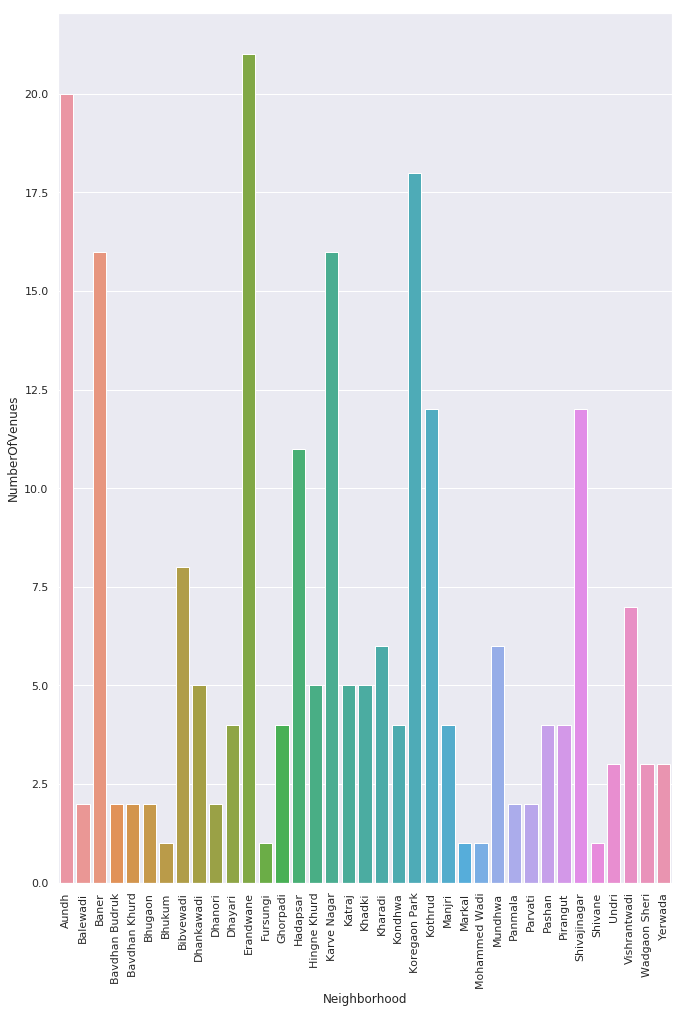

In [122]:
plot = sns.barplot(x = individual_pn_venue_count['Neighborhood'],y=individual_pn_venue_count['NumberOfVenues'])
plot.set_xticklabels(individual_pn_venue_count['Neighborhood'],rotation=90)

In [123]:
pn_venues_onehot = pd.get_dummies(pn_venues[['Venue Category']])

In [124]:
pn_venues_onehot['Neighborhood'] = pn_venues['Neighborhood']
pn_venues_grouped = pn_venues_onehot.groupby('Neighborhood').mean().reset_index()
pn_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bistro,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,...,Venue Category_Shopping Mall,Venue Category_Shopping Plaza,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar
0,Aundh,0.000000,0.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.050000,0.0000
1,Balewadi,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.500000,0.000000,0.000000,0.0000
2,Baner,0.000000,0.0,0.000000,0.062500,0.000000,0.000000,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.0625
3,Bavdhan Budruk,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000
4,Bavdhan Khurd,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000
5,Bhugaon,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000
6,Bhukum,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000
7,Bibvewadi,0.000000,0.0,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,...,0.125000,0.000000,0.000000,0.250000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000
8,Dhankawadi,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.200000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000
9,Dhanori,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0000


In [125]:
number_of_top_venues = 5

In [126]:
for hood in pn_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = pn_venues_grouped[pn_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Aundh ---------
                                      Venue  Frequency
0               Venue Category_Dessert Shop       0.15
1          Venue Category_Indian Restaurant       0.10
2                     Venue Category_Bakery       0.10
3              Venue Category_Shopping Mall       0.05
4  Venue Category_Middle Eastern Restaurant       0.05


--------- Balewadi ---------
                                           Venue  Frequency
0                             Venue Category_Gym        0.5
1                        Venue Category_Tea Room        0.5
2                             Venue Category_ATM        0.0
3        Venue Category_Maharashtrian Restaurant        0.0
4  Venue Category_Multicuisine Indian Restaurant        0.0


--------- Baner ---------
                                    Venue  Frequency
0        Venue Category_Indian Restaurant       0.19
1                   Venue Category_Lounge       0.12
2           Venue Category_Breakfast Spot       0.12
3  Venue Cate

In [127]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [128]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pn_venues_grouped['Neighborhood']

for ind in np.arange(pn_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pn_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aundh,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Department Store,Venue Category_Coffee Shop,Venue Category_Diner,Venue Category_Multiplex,Venue Category_Donut Shop,Venue Category_Café
1,Balewadi,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Electronics Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Fast Food Restaurant
2,Baner,Venue Category_Indian Restaurant,Venue Category_South Indian Restaurant,Venue Category_Lounge,Venue Category_Breakfast Spot,Venue Category_Whisky Bar,Venue Category_Juice Bar,Venue Category_Malay Restaurant,Venue Category_BBQ Joint,Venue Category_Pizza Place,Venue Category_Mobile Phone Shop
3,Bavdhan Budruk,Venue Category_ATM,Venue Category_Pool,Venue Category_Creperie,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store
4,Bavdhan Khurd,Venue Category_ATM,Venue Category_Pool,Venue Category_Creperie,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store


In [129]:
neighborhoods_venues_sorted.shape

(37, 11)

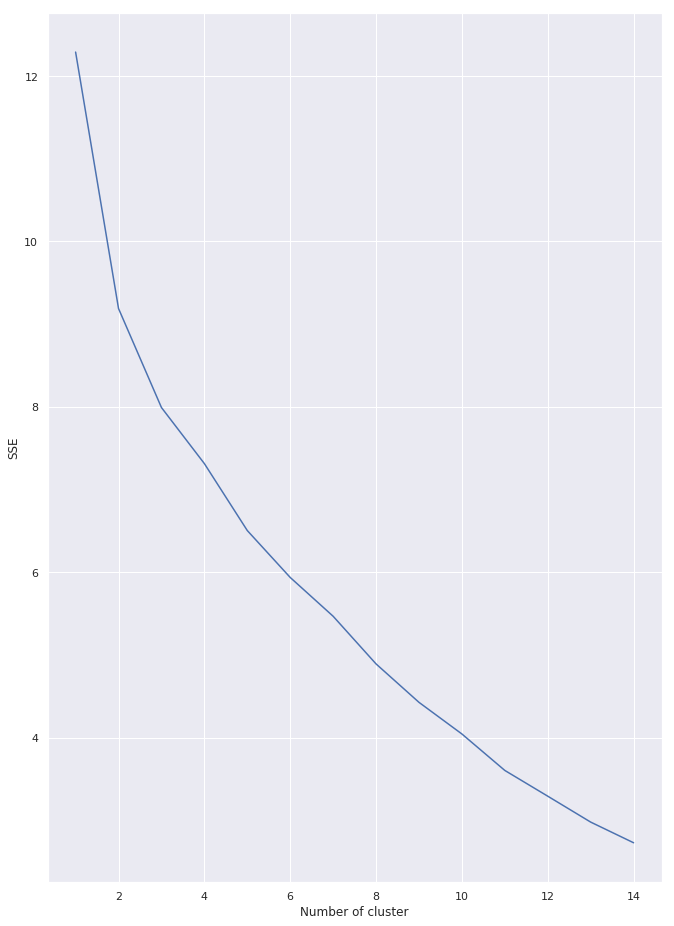

In [130]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(pn_venues_grouped.drop('Neighborhood',axis=1))
    pn_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Optimal value for clusters is 5.

In [132]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(pn_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [133]:
pn_venues_grouped['Cluster'] = kmeans.labels_

In [134]:
pn_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0     8
1    15
2     3
3     5
4     6
Name: Neighborhood, dtype: int64

In [135]:
pn_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM', 'Venue Category_Arcade',
       'Venue Category_Asian Restaurant', 'Venue Category_BBQ Joint',
       'Venue Category_Bakery', 'Venue Category_Bistro',
       'Venue Category_Breakfast Spot', 'Venue Category_Brewery',
       'Venue Category_Burger Joint', 'Venue Category_Bus Station',
       'Venue Category_Business Service', 'Venue Category_Café',
       'Venue Category_Cheese Shop', 'Venue Category_Chinese Restaurant',
       'Venue Category_Clothing Store', 'Venue Category_Coffee Shop',
       'Venue Category_Convenience Store', 'Venue Category_Creperie',
       'Venue Category_Department Store', 'Venue Category_Dessert Shop',
       'Venue Category_Diner', 'Venue Category_Dog Run',
       'Venue Category_Donut Shop', 'Venue Category_Dumpling Restaurant',
       'Venue Category_Eastern European Restaurant',
       'Venue Category_Electronics Store',
       'Venue Category_Fast Food Restaurant', 'Venue Category_Food Court',
       'Venue C

In [136]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(pn_venues_grouped,on='Neighborhood')

In [137]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Shopping Plaza,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Cluster
0,Aundh,Venue Category_Dessert Shop,Venue Category_Bakery,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Department Store,Venue Category_Coffee Shop,Venue Category_Diner,Venue Category_Multiplex,Venue Category_Donut Shop,...,0.0,0.0,0.0,0.000,0.05,0.0,0.0,0.05,0.0000,1
1,Balewadi,Venue Category_Gym,Venue Category_Tea Room,Venue Category_Electronics Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.000,0.00,0.5,0.0,0.00,0.0000,2
2,Baner,Venue Category_Indian Restaurant,Venue Category_South Indian Restaurant,Venue Category_Lounge,Venue Category_Breakfast Spot,Venue Category_Whisky Bar,Venue Category_Juice Bar,Venue Category_Malay Restaurant,Venue Category_BBQ Joint,Venue Category_Pizza Place,...,0.0,0.0,0.0,0.125,0.00,0.0,0.0,0.00,0.0625,0
3,Bavdhan Budruk,Venue Category_ATM,Venue Category_Pool,Venue Category_Creperie,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.00,0.0000,1
4,Bavdhan Khurd,Venue Category_ATM,Venue Category_Pool,Venue Category_Creperie,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Dog Run,Venue Category_Donut Shop,Venue Category_Dumpling Restaurant,Venue Category_Eastern European Restaurant,...,0.0,0.0,0.0,0.000,0.00,0.0,0.0,0.00,0.0000,1


In [138]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(pn_venues,on='Neighborhood')

In [139]:
map_clusters = folium.Map(location=[pn_latitude, pn_longitude], zoom_start=11)

In [140]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [141]:
map_clusters

## Recommending Dealer Location based on User Input

In [143]:
pune_pop['Normalized_population'] = pune_pop['Population']/pune_pop['Population'].max(axis=0)
pune_pop.head()

,Neighborhoods,Population,Normalized_population
0,Aundh,1000,1.0
1,Baner,1000,1.0
2,Bavdhan Khurd,1000,1.0
3,Bavdhan Budruk,1000,1.0
4,Balewadi,1000,1.0


In [145]:
pn_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bistro,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,...,Venue Category_Shopping Plaza,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Cluster
0,Aundh,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.05,0.0,1


## There are no dealer locations found in the dataset

### Recommending veg Restaurants

In [146]:
pn_veg = pn_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
pn_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Arcade,Venue Category_Asian Restaurant,Venue Category_BBQ Joint,Venue Category_Bakery,Venue Category_Bistro,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Burger Joint,...,Venue Category_Shopping Mall,Venue Category_Shopping Plaza,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Sports Bar,Venue Category_Tea Room,Venue Category_Thai Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar
0,Aundh,0,0,0,0,2,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,Balewadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Baner,0,0,0,1,0,0,2,0,0,...,0,0,0,0,2,0,0,0,0,1
3,Bavdhan Budruk,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bavdhan Khurd,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
pn_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [148]:
pn_veg = pn_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [149]:
pn_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [150]:
pn_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Aundh,1
1,Balewadi,0
2,Baner,0
3,Bavdhan Budruk,0
4,Bavdhan Khurd,0


In [151]:
pn_veg['NumberOfNonVeganrestaurants'] = 1-(pn_veg['NumberOfVegRestaurants']/pn_veg['NumberOfVegRestaurants'].max(axis=0))

In [152]:
pn_veg.head(8)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Aundh,1,0.0
1,Balewadi,0,1.0
2,Baner,0,1.0
3,Bavdhan Budruk,0,1.0
4,Bavdhan Khurd,0,1.0
5,Bhugaon,0,1.0
6,Bhukum,0,1.0
7,Bibvewadi,0,1.0


## Based on the data we can see that Aundh Neighborhood has maximum number of veg restaurants

# End of Project